In [17]:
import os
from pathlib import Path
import shutil

from postopus import Run

example_dir = "examples/methane"
# Path to some example data
path_to_octopus_output = Path(example_dir)

In [52]:
# first run ground state calculations by
# copying the inp from example_di/calculation_gs to example_dir and run octopus
shutil.copyfile(
    os.path.join(example_dir, "calculation_gs", "inp"),
    os.path.join(example_dir, "inp")
)
! cd {example_dir}  && octopus > out_gs.log 2>&1 
! cd {example_dir}  && head -n 20 out_gs.log  # Just to see the first 20 lines of the octopus output

    <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
                                ___
                             .-'   `'.
                            /         \
                            |         ;
                            |         |           ___.--,
                   _.._     |0) ~ (0) |    _.---'`__.-( (_.
            __.--'`_.. '.__.\    '--. \_.-' ,.--'`     `""`
           ( ,.--'`   ',__ /./;   ;, '.__.'`    __
           _`) )  .---.__.' / |   |\   \__..--""  """--.,_
          `---' .'.''-._.-'`_./  /\ '.  \ _.-~~~````~~~-._`-.__.'
                | |  .' _.-' |  |  \  \  '.               `~---`
                 \ \/ .'     \  \   '. '-._)
                  \/ /        \  \    `=.__`~-.
             jgs  / /\         `) )    / / `"".`\
            , _.-'.'\ \        / /    ( (     / /
             `--~`   ) )    .-'.'      '.'.  | (
                    (/`    ( (`          ) )  '-;
                     `      '-;         (-'



In [51]:
# then run the td calculations by
# copying the inp from example_di/calculation_td to example_dir and run octopus
shutil.copyfile(
    os.path.join(example_dir, "calculation_td", "inp"),
    os.path.join(example_dir, "inp")
)

! cd {example_dir}  && octopus > out_td.log  2>&1
! cd {example_dir}  && head -n 20 out_td.log # Just to see the first 20 lines of the octopus output

    <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
                                ___
                             .-'   `'.
                            /         \
                            |         ;
                            |         |           ___.--,
                   _.._     |0) ~ (0) |    _.---'`__.-( (_.
            __.--'`_.. '.__.\    '--. \_.-' ,.--'`     `""`
           ( ,.--'`   ',__ /./;   ;, '.__.'`    __
           _`) )  .---.__.' / |   |\   \__..--""  """--.,_
          `---' .'.''-._.-'`_./  /\ '.  \ _.-~~~````~~~-._`-.__.'
                | |  .' _.-' |  |  \  \  '.               `~---`
                 \ \/ .'     \  \   '. '-._)
                  \/ /        \  \    `=.__`~-.
             jgs  / /\         `) )    / / `"".`\
            , _.-'.'\ \        / /    ( (     / /
             `--~`   ) )    .-'.'      '.'.  | (
                    (/`    ( (`          ) )  '-;
                     `      '-;         (-'



In [ ]:
# Instantiate Run object
run = Run(path_to_octopus_output)

In [18]:
run.systems.keys()

dict_keys(['default'])

In [20]:
run.default.system_data.keys()

dict_keys(['scf', 'td'])

In [27]:
density =  run.default.scf.density
xa = density.get_converged(source="ncdf")

In [28]:
xa.coords

Coordinates:
  * x        (x) float64 -7.483 -7.143 -6.803 -6.463 ... 6.463 6.803 7.143 7.483
  * y        (y) float64 -7.483 -7.143 -6.803 -6.463 ... 6.463 6.803 7.143 7.483
  * z        (z) float64 -7.483 -7.143 -6.803 -6.463 ... 6.463 6.803 7.143 7.483
  * step     (step) int64 17

In [29]:
xa.values.shape

(1, 45, 45, 45)

In [44]:
s0 = xa.isel(z=22)

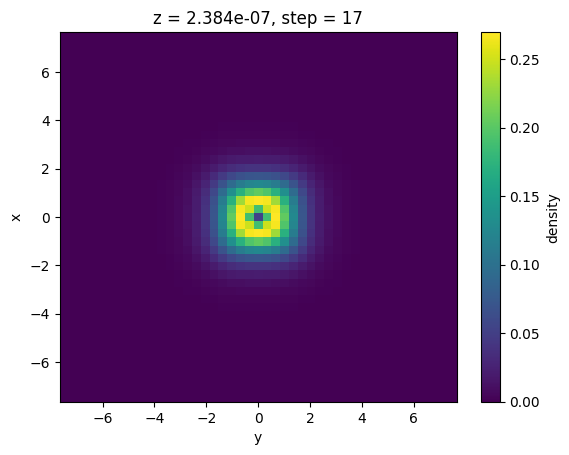

In [45]:
s0.plot()